In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from scipy.misc import imsave
from PIL import Image
from sklearn.decomposition import PCA
import rasterio
import cv2

In [5]:
prob_files=glob('/data/DW/ordinary/DRN_RCN/' +
                'DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/*/prob/*.npy')

In [6]:
prob_files

['/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_senext50_batch16/prob/DFC2020_tes_unet_senext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnext50_batch16/prob/DFC2020_tes_unet_resnext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnet50_batch32/prob/DFC2020_tes_unet_resnet_32_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_cbamnet50_batch16_smft/prob/DFC2020_tes_unet_cbamnet_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnext50_batch32_smft/prob/DFC2020_tes_unet_resnext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnet50_batch16_tta/prob/DFC2020_tes_unet_resnet_1_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnet101_batch16_smft/prob/DFC2020_tes_unet_resnet_16_.npy',
 '/data/D

In [7]:
prob_files_group1=[]
prob_files_group2=[]

for i in tqdm(range(len(prob_files))):
    if 'smft' in prob_files[i]:
        prob_files_group2.append(prob_files[i])
    else:
        prob_files_group1.append(prob_files[i])    

100%|██████████| 26/26 [00:00<00:00, 49546.53it/s]


In [8]:
prob_files_group1

['/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_senext50_batch16/prob/DFC2020_tes_unet_senext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnext50_batch16/prob/DFC2020_tes_unet_resnext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnet50_batch32/prob/DFC2020_tes_unet_resnet_32_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnet50_batch16_tta/prob/DFC2020_tes_unet_resnet_1_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_senet50_batch16/prob/DFC2020_tes_unet_senet_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_cbamnext50_batch16/prob/DFC2020_tes_unet_cbamnext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_senext50_batch32/prob/DFC2020_tes_unet_senext_32_.npy',
 '/data/DW/ordinary/DRN_RCN

In [9]:
prob_files_group2

['/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_cbamnet50_batch16_smft/prob/DFC2020_tes_unet_cbamnet_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnext50_batch32_smft/prob/DFC2020_tes_unet_resnext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_resnet101_batch16_smft/prob/DFC2020_tes_unet_resnet_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_cbamnext50_batch32_smft/prob/DFC2020_tes_unet_cbamnext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_cbamnext50_batch16_smft/prob/DFC2020_tes_unet_cbamnext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_senext50_batch32_smft/prob/DFC2020_tes_unet_senext_16_.npy',
 '/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/unet_senext50_batch16_smft/prob/DFC2020_tes_unet_sen

In [10]:
# prob=np.load('/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED'+
#              '/pretes_track2/unet_resnet50_batch16_tta/prob/DFC2020_tes_unet_resnet_1_.npy')
for i in tqdm(range(len(prob_files_group1))):
    if i==0:
        group1_prob=np.load(prob_files_group1[i])
    else:
        group1_prob+=np.load(prob_files_group1[i])

100%|██████████| 13/13 [10:40<00:00, 52.82s/it]


In [11]:
for i in tqdm(range(len(prob_files_group2))):
    if i==0:
        group2_prob=np.load(prob_files_group2[i])
    else:
        group2_prob+=np.load(prob_files_group2[i])

100%|██████████| 13/13 [15:22<00:00, 68.34s/it]


In [2]:
prob_files_group3=glob('/data/sihan.zhu/competetion/DFC2020/result/*/prob/*.npy')

In [3]:
prob_files_group3

['/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_7740_batch16/prob/DFC2020_tes_unet_resnet_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_5906_batch32/prob/DFC2020_tes_unet_cbamnext_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_6891_batch16/prob/DFC2020_tes_unet_senext_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_7075_batch32/prob/DFC2020_tes_unet_senext_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_6274_batch32/prob/DFC2020_tes_unet_cbamnet_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_6709_batch16/prob/DFC2020_tes_unet_cbamnext_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_7269_batch16/prob/DFC2020_tes_unet_resnext_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trntesla

In [5]:
for i in tqdm(range(len(prob_files_group3))):
    if i==0:
        group3_prob=np.load(prob_files_group3[i])
    else:
        group3_prob+=np.load(prob_files_group3[i])


100%|██████████| 13/13 [10:51<00:00, 58.21s/it]


chosen from group3

In [7]:
idx=[11,8,9,3,4]
prob_files_group4=[]
for idd in idx:
    prob_files_group4.append(prob_files_group3[idd])

In [8]:
prob_files_group4

['/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_batch16_7719/prob/DFC2020_tes_unet_resnet_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_6896_batch32/prob/DFC2020_tes_unet_resnext_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_6386_batch32/prob/DFC2020_tes_unet_senet_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_7075_batch32/prob/DFC2020_tes_unet_senext_16_.npy',
 '/data/sihan.zhu/competetion/DFC2020/result/jiu_olyfilter_fo_lovasz_trnteslab_6274_batch32/prob/DFC2020_tes_unet_cbamnet_16_.npy']

In [9]:
for i in tqdm(range(len(prob_files_group4))):
    if i==0:
        group4_prob=np.load(prob_files_group4[i])
    else:
        group4_prob+=np.load(prob_files_group4[i])

100%|██████████| 5/5 [04:36<00:00, 54.80s/it]


In [10]:
#prob=group1_prob+group2_prob+group3_prob
prob=group4_prob

In [11]:
prob.shape

(5128, 8, 256, 256)

filename

In [2]:
def load_tesdata(base_dir):

    s1_dir=glob(base_dir+'s1_0'+'/'+'*.tif')
    s2_dir=[]
    lc_dir=[]
    for i in tqdm(range(len(s1_dir))):
        s1_filename=os.path.basename(s1_dir[i])
        former=s1_filename.split('_s1')[0]
        ID=s1_filename.split('_s1')[1]
        s2_dir.append(base_dir+'s2_0/'+former+'_s2'+ID)
        lc_dir.append(base_dir + 'lc_0/' + former + '_lc' + ID)

    s1_dir=np.array(s1_dir)
    s2_dir=np.array(s2_dir)
    lc_dir=np.array(lc_dir)

    return s1_dir,s2_dir,lc_dir

def read_data(f1,f2):

    with rasterio.open(f1) as patch:
        x1 = patch.read(list(range(1,3)))

    with rasterio.open(f2) as patch:
        x2 = patch.read(list(range(1,14)))

    return x1,x2

def clean(x1,x2):
    # s1
    x1[np.isnan(x1)] = 0
    # s2
    x2[np.isnan(x2)] = 0

    # s1_recommend
    x1[x1<-25]=-25
    x1[x1>0]=0
    # s2_recommend
    x2[x2 < 0] = 0
    x2[x2>10000]=10000

    return x1.astype('float32'),x2.astype('float32')

def norm(x1,x2):
    # input,x1:[-25,0],x2:[0,5000]
    h,w,c1=x1.shape
    h,w,c2=x2.shape
    x2 /= 10000 * 1.0
    # recommend: x1[0,1],x2:[0,1]
    x1 = (x1 + 25) / 25 * 1.0
    return x1.reshape(h,w,c1),x2.reshape(h,w,c2)

base_dir = '/data/PublicData/DF2020/test_track1/'
s1_dir,s2_dir,lc_dir=load_tesdata(base_dir)

100%|██████████| 5128/5128 [00:00<00:00, 213747.98it/s]


In [3]:
pre_hex_color_dict={10:'000000',0:'009900',1:'c6b044',2:'fbff13',
                    3:'b6ff05',4:'27ff87',5:'c24f44',
                    6:'a5a5a5',7:'000000',8:'f9ffa4',9:'1c0dff'}

def Hex_to_RGB(str):
    r = int(str[0:2],16)
    g = int(str[2:4],16)
    b = int(str[4:6],16)
    return [r,g,b]

def DrawResult(labels, row, col):
    num_class = 10

    X_result = np.zeros((labels.shape[0], 3))
    for i in range(num_class):
        X_result[np.where(labels == i), 0] = Hex_to_RGB(pre_hex_color_dict[i])[0]
        X_result[np.where(labels == i), 1] = Hex_to_RGB(pre_hex_color_dict[i])[1]
        X_result[np.where(labels == i), 2] = Hex_to_RGB(pre_hex_color_dict[i])[2]

    X_result = np.reshape(X_result, (row, col, 3))

    return X_result

In [4]:
net2templab={0:0,
             1:1,
             2:3,
             3:4,
             4:5,
             5:6,
             6:8,
             7:9}
outputdir='/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED\
/pretes_track2/group3_postprocess/output/'

visdir='/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED\
/pretes_track2/group3_postprocess/vis/'

optimize

In [11]:
#https://blog.csdn.net/wsp_1138886114/article/details/84228939
def guideFilter(I, p, winSize, eps):

    mean_I = cv2.blur(I, winSize)      # I的均值平滑
    mean_p = cv2.blur(p, winSize)      # p的均值平滑

    mean_II = cv2.blur(I * I, winSize) # I*I的均值平滑
    mean_Ip = cv2.blur(I * p, winSize) # I*p的均值平滑

    var_I = mean_II - mean_I * mean_I  # 方差
    cov_Ip = mean_Ip - mean_I * mean_p # 协方差

    a = cov_Ip / (var_I + eps)         # 相关因子a
    b = mean_p - a * mean_I            # 相关因子b

    mean_a = cv2.blur(a, winSize)      # 对a进行均值平滑
    mean_b = cv2.blur(b, winSize)      # 对b进行均值平滑

    q = mean_a * I + mean_b
    return q

In [35]:
pca1=PCA(n_components=1)
pca2=PCA(n_components=3)

In [65]:
idxs=np.arange(5128)
np.random.shuffle(idxs)

try

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

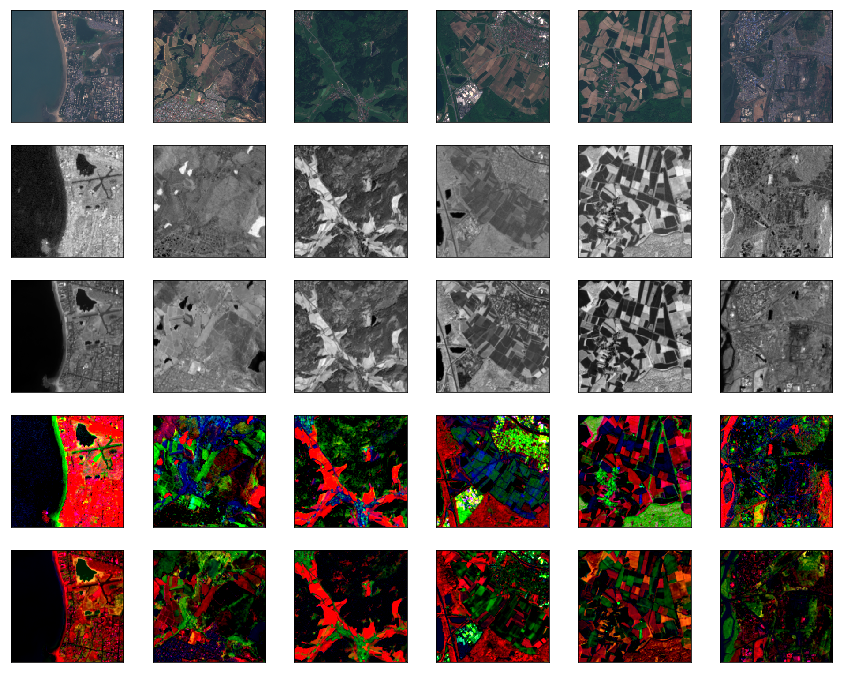

In [66]:
plt.figure(1,figsize=(25,12))

for i in range(6):
    f1=s1_dir[idxs[i]]
    f2=s2_dir[idxs[i]]
    
    x1,x2=read_data(f1,f2)
    x1=x1.transpose(1,2,0)#h,w,c
    x2=x2.transpose(1,2,0)
    x2 = x2[:, :, [1, 2, 3, 4, 5, 6, 7, 8, 11, 12]]
    x1,x2=clean(x1,x2)
    x1,x2=norm(x1,x2)
    
    x=np.concatenate((x1,x2),axis=-1).reshape(-1,12)
    y=x2.reshape(-1,10)
    P1=pca1.fit_transform(x).reshape(256,256)
    P2=pca1.fit_transform(y).reshape(256,256)
    
    P3=pca2.fit_transform(x)
    P4=pca2.fit_transform(y)
    
    P1=(P1-np.min(P1))/(np.max(P1)-np.min(P1))
    P2=(P2-np.min(P2))/(np.max(P2)-np.min(P2))
#     P3=(P3-np.min(P3))/(np.max(P3)-np.min(P3))
#     P4=(P4-np.min(P4))/(np.max(P4)-np.min(P4))

    P3=P3.reshape(256,256,3)
    P4=P4.reshape(256,256,3)
    
    plt.subplot(5,10,i+1)
    plt.imshow(x2[:,:,[2,1,0]]*3)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,10,i+11)
    plt.imshow(P1,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,10,i+21)
    plt.imshow(P2,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,10,i+31)
    plt.imshow(P3*3)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,10,i+41)
    plt.imshow(P4*3)
    plt.xticks([])
    plt.yticks([])

optimize

In [6]:
prob=group3_prob

In [23]:
np.save('/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/group3_prob.npy',group3_prob)

In [5]:
prob=np.load('/data/DW/ordinary/DRN_RCN/DataFusion2020_TRAD_SEMISUPERVISED/pretes_track2/group3_prob.npy')

In [22]:
optim_prob=np.zeros([5128,8,256,256]).astype('float16')
pca2=PCA(n_components=3)

for i in tqdm(range(5128)):
    f1=s1_dir[i]
    f2=s2_dir[i]
    
    x1,x2=read_data(f1,f2)
    x1=x1.transpose(1,2,0)#h,w,c
    x2=x2.transpose(1,2,0)
    x2 = x2[:, :, [1, 2, 3, 4, 5, 6, 7, 8, 11, 12]]
    x1,x2=clean(x1,x2)
    x1,x2=norm(x1,x2)
    
    x=np.concatenate((x1,x2),axis=-1).reshape(-1,12)
    #y=x2.reshape(-1,10)

    P=pca2.fit_transform(x).reshape(256,256,3)
    
    I=prob[i]/np.sum(prob[i],axis=0,keepdims=True)
    
    # Guide Filter
    
    II=I.transpose(1,2,0)#256,256,8
   
    out = cv2.cv2.ximgproc.guidedFilter(P,II,25,0.01)
    
    optim_prob[i]=out.transpose(2,0,1)


100%|██████████| 5128/5128 [11:02<00:00,  7.74it/s]


output/no_optimize

In [6]:
def Cal_INDEX(x):

    x=x.astype('float')

    x[x>10000]=10000
    x[x<0]=0

    B = x[1, :, :]
    R = x[3, :, :]
    G = x[2, :, :]
    Nir = x[7, :, :]  # TM4
    Mir = x[10, :, :]  # TM5
    SWir= x[11,:,:]

    NDWI = (G - Nir) / (G + Nir)
    NDVI = (Nir - R) / (Nir + R)

    return NDWI,NDVI

In [9]:
for i in tqdm(range(5128)):
    
    tmp=prob[i]#8,256,256
    
    tmp_lab=np.argmax(tmp,axis=0).squeeze()
    
    # mapping
    
    h,w=tmp_lab.shape

    tmp_lab=tmp_lab.reshape(-1)

    label = list(map(lambda x: net2templab[x], tmp_lab))

    label = np.array(label)  # list->array

    label= label.reshape(h, w)
    
    # image
    
    im = np.uint8(label + 1)
    
    # postprocess
    
    im_tmp = im.copy()
    y_pre_tmp = label.copy()
    
    with rasterio.open(s2_dir[i]) as patch:
        x2_img = patch.read(list(range(1, 14)))

    NDWI,NDVI=Cal_INDEX(x2_img)
    
    # barren

    im[np.where((NDWI < 0) & (NDVI < 0.2) & (NDVI > 0) 
                & (im_tmp != 6) & (im_tmp != 7))] = 9
    label[np.where((NDWI < 0) & (NDVI < 0.2) & (NDVI > 0) 
                & (y_pre_tmp != 5) & (y_pre_tmp != 6))] = 8

    # shrubland

    im[np.where((NDWI < 0) & (NDVI < 0.4) & (NDVI > 0.2) 
                & (im_tmp != 1) & (im_tmp != 6) & (im_tmp != 7))] = 2
    label[np.where((NDWI < 0) & (NDVI < 0.4) & (NDVI > 0.2) 
                & (y_pre_tmp != 0) & (y_pre_tmp != 5)& (y_pre_tmp != 6))] = 1
            
    # save
    
    filename=os.path.basename(lc_dir[i])
    former = filename.split('lc')[0]
    latter = filename.split('lc')[1]

    imsave(outputdir + former + 'dfc' + latter, im)
    im_rgb = Image.fromarray(np.uint8(DrawResult(label.reshape(-1), 256, 256)))
    im_rgb.save(visdir + former + 'dfc' + latter[:-4] + '_vis.png')

  0%|          | 0/5128 [00:00<?, ?it/s]/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/ipykernel_launcher.py:53: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
100%|██████████| 5128/5128 [05:50<00:00, 14.64it/s]
